In [7]:
import pandas as pd
import numpy as np
import cv2
import os
import re
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2
import torch.nn as nn
import torch
import torchvision
from PIL import Image
import matplotlib.pyplot as plt

from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor
from torch.utils.data import DataLoader, Dataset

from matplotlib import pyplot as plt
from torchvision import transforms as T
from xml.etree import ElementTree as et

In [8]:
def get_model(num_classes):
    pretrained_base_model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
    # print(pretrained_base_model)

    in_features = pretrained_base_model.roi_heads.box_predictor.cls_score.in_features
    pretrained_base_model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    mask_in_channels = pretrained_base_model.roi_heads.mask_predictor.conv5_mask.in_channels
    pretrained_base_model.roi_heads.mask_predictor = MaskRCNNPredictor(mask_in_channels, 256, num_classes)
    return pretrained_base_model


In [9]:
num_classes = 2  # the background class and the pedestrian class
model = get_model(num_classes)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = torch.load("model.pth", map_location=torch.device('cpu'))
model.to(device)

MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

In [10]:
model.eval()
img = Image.open("T0001_XM_20110811140245_01_16.jpg")
resized_img = img.resize((256, 256))
transform = T.ToTensor()
ig = transform(resized_img)
with torch.no_grad():
    pred = model([ig.to(device)])

In [11]:
mask = (pred[0]["masks"][0].cpu().detach().numpy() * 255).astype("uint8").squeeze()

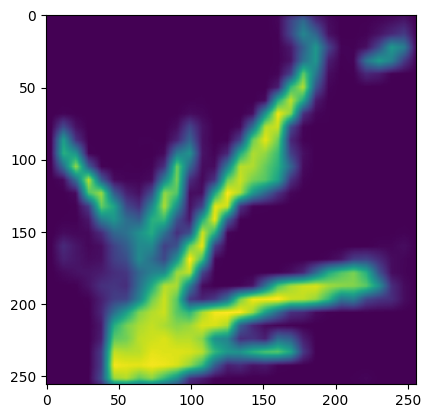

In [12]:
plt.imshow(mask)